https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input,Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

Using Theano backend.
Using gpu device 0: GeForce GT625M (CNMeM is disabled, cuDNN not available)


In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
%matplotlib inline

In [4]:
def plot_imgs(decoded_images,n=20):

    plt.figure(figsize=(20,4))
    for i in range(n):
        # original digit
        ax = plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # reconstruction
        ax = plt.subplot(2,n,i+1+n)
        plt.imshow(decoded_images[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

# relu activation

In [ ]:
%%time

encoded = None
decoded = None

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=2,  
               nb_epoch = 50,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# linear activation

In [ ]:
encoded = None
decoded = None

encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))


decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=2,  
               nb_epoch = 50,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# using regularization

In [ ]:
%%time

encoded = None
decoded = None

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.activity_l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)

encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


autoencoder.fit(x_train, x_train,
               verbose=2,  
               nb_epoch = 50,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

# deep autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
2s - loss: 0.3585 - val_loss: 0.2649
Epoch 2/100
2s - loss: 0.2594 - val_loss: 0.2526
Epoch 3/100
2s - loss: 0.2407 - val_loss: 0.2297
Epoch 4/100
2s - loss: 0.2256 - val_loss: 0.2202
Epoch 5/100
2s - loss: 0.2146 - val_loss: 0.2069
Epoch 6/100
3s - loss: 0.1979 - val_loss: 0.1900
Epoch 7/100
3s - loss: 0.1867 - val_loss: 0.1826
Epoch 8/100
3s - loss: 0.1803 - val_loss: 0.1770
Epoch 9/100
3s - loss: 0.1745 - val_loss: 0.1707
Epoch 10/100
2s - loss: 0.1695 - val_loss: 0.1651
Epoch 11/100
2s - loss: 0.1651 - val_loss: 0.1621
Epoch 12/100
2s - loss: 0.1616 - val_loss: 0.1592
Epoch 13/100
2s - loss: 0.1587 - val_loss: 0.1560
Epoch 14/100
2s - loss: 0.1563 - val_loss: 0.1548
Epoch 15/100
2s - loss: 0.1540 - val_loss: 0.1505
Epoch 16/100
2s - loss: 0.1518 - val_loss: 0.1500
Epoch 17/100
2s - loss: 0.1494 - val_loss: 0.1482
Epoch 18/100
3s - loss: 0.1472 - val_loss: 0.1451
Epoch 19/100
2s - loss: 0.1449 - val_loss: 0.1417
Epoch 20/

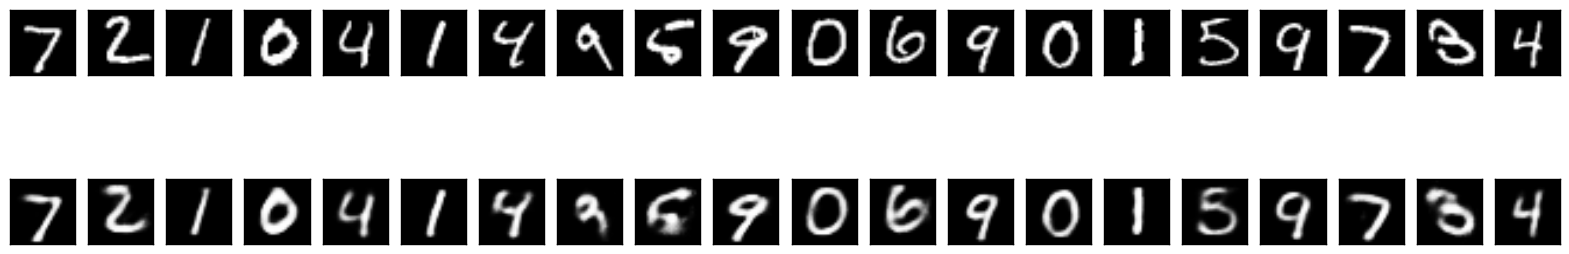

CPU times: user 3min 19s, sys: 1min 34s, total: 4min 54s
Wall time: 4min 54s


In [5]:
%%time

encoded = None
decoded = None

input_img = Input(shape=(784,))

encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)

decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)


encoder = Model(input=input_img, output = encoded)
encoded_input = Input(shape=(32,))

decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output= decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, nb_epoch=100, verbose=2,
               batch_size=256,shuffle=True,
               validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plot_imgs(decoded_imgs)

In [ ]:
encoded = None
decoded = None

input_img = Input(shape=(1,28,28))
x = Convolution2D(16,3,3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)

encoded = MaxPooling2D((2,2),border_mode='same')(x)

# at this point the representation has 8 x 4 x 4 = 128 dimensions
x = Convolution2D(8,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(8,3,3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2,2))(x)
x = Convolution2D(16,3,3, activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Convolution2D(1,3,3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

# the tutorial suggests we use tensorflow but I'll use theano

autoencoder.fit(x_train,x_train,
            verbose=2,
            nb_epoch=50,
            batch_size=128,
            shuffle=True,
            validation_data=(x_test,x_test))

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
plot_imgs(decoded_imgs)

## denoising

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

noise_factor= 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [ ]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy, 0.,1.)

In [ ]:
plot_imgs(x_test_noisy)

In [ ]:
input_img = Input(shape=(1,28,28))

x = Convolution2D(32,3,3,activation='relu',border_mode='same')(input_img)
x = MaxPooling2D((2,2), border_mode='same')(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
encoded = MaxPooling2D((2,2),border_mode='same')(x)

# at this point the representation is (32,7,7)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(32,3,3,activation='relu',border_mode='same')(x)
x = UpSampling2D((2,2))(x)

decoded = Convolution2D(1,3,3,activation='sigmoid',border_mode='same')(x)

autoencoder = Model(input_img,decoded)

# decoder_layer1 = autoencoder.layers[-4]
# decoder_layer2 = autoencoder.layers[-3]
# decoder_layer3 = autoencoder.layers[-2]
# decoder_layer4 = autoencoder.layers[-1]

# encoded_input = Input(shape=(32,7,7))

# decoder = Model(
#     input=encoded_input, 
#     output= decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))


autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

# the source is noisy, but the target isn't?
autoencoder.fit(x_train_noisy,x_train,
               nb_epoch=100,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy,x_test))


decoded_imgs = autoencoder.predict(x_test)
plot_imgs(decoded_imgs)